In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import json
import os
import pandas as pd
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/elsevier/Bert-NER


In [5]:
# show models
for item in os.listdir('saved_models/'):
   print(item)

2024-04-09_n_0_b_1_s_1_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-09_n_0_b_1_s_18_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001


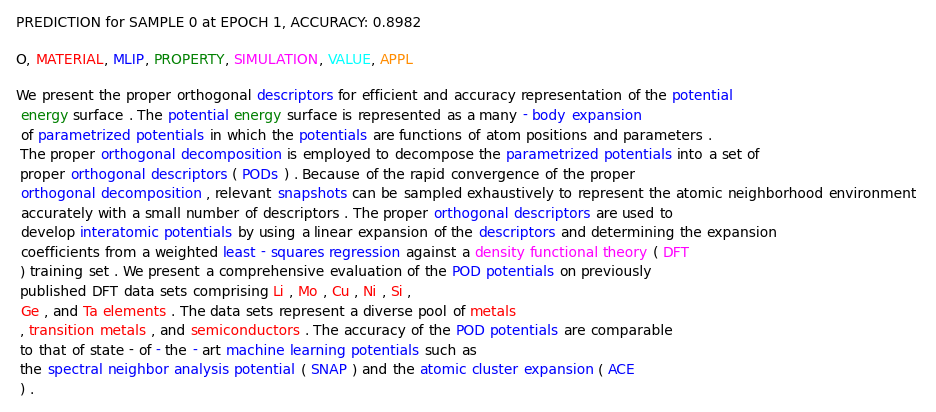

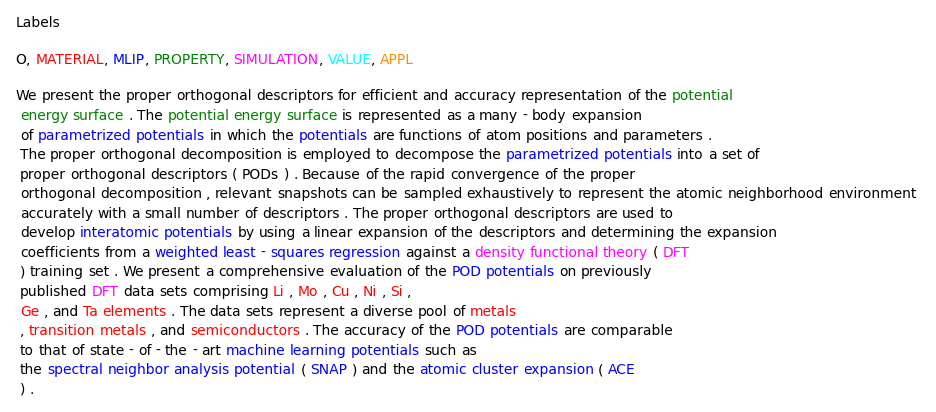

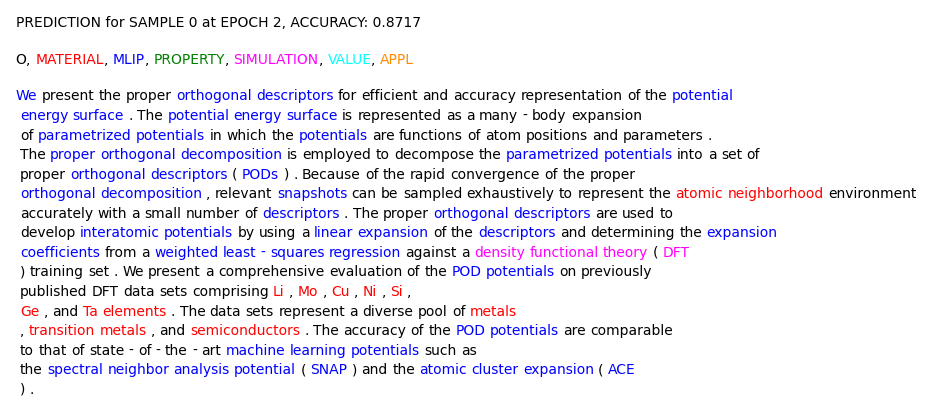

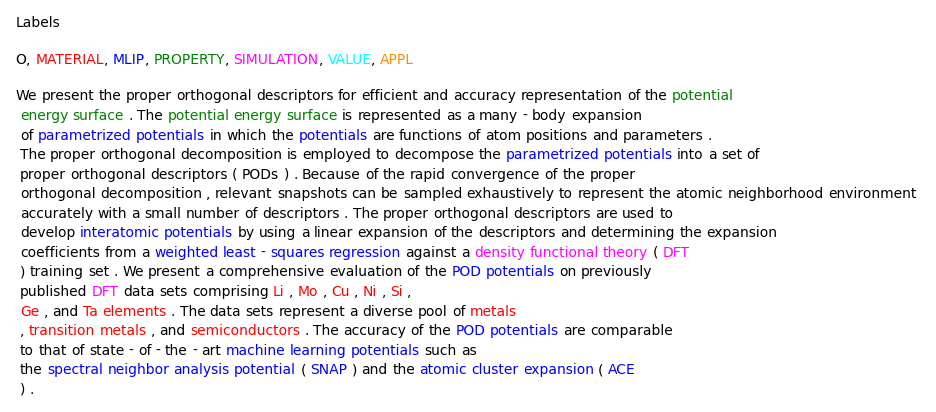

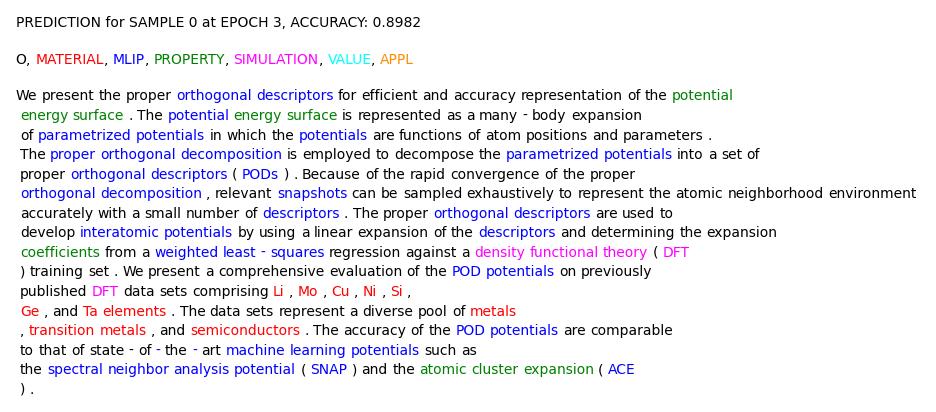

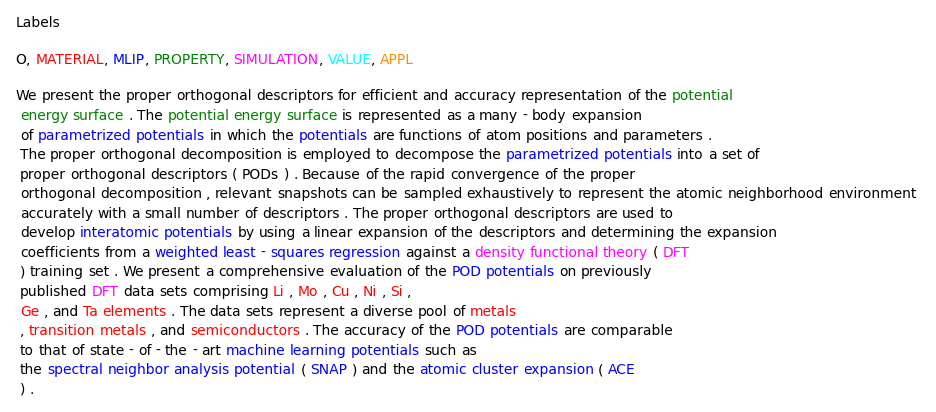

In [18]:
# Load and visualize previous test data
model_name = '2024-04-09_n_0_b_1_s_18_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001'
epochs = [1, 2, 3]
sample_ids = [0]
for epoch in epochs:
    for sample_id in sample_ids:
        sample_file = f'saved_models/{model_name}/{model_name}_e_{epoch}_test_{sample_id}.json'
        with open(sample_file) as f:
            for jsonObj in f:
                record = json.loads(jsonObj)
        # calculate accuracy
        counts = 0
        for ii in range(len(record['pred'])):
            if record['pred'][ii] == record['labels'][ii]:
                counts += 1
        accuracy = counts / len(record['pred'])

        colors = ['black', 'red', 'blue', 'green', 'magenta', 'cyan', 'darkorange']
        word_list_marked = ['<' + w + '>' for w in record['words']]
        markers_labels = [{"color": colors[i]} for i in record['labels']]
        markers_pred = [{"color": colors[i]} for i in record['pred']]
        j = 0
        for i in range(len(record['words'])):
            if (i + 1) % 15 == 0:
                word_list_marked.insert(i + j, '\n')
                j += 1

        fig, ax = plt.subplots()
        ax.set_axis_off()
        HighlightText(x=0., y=1.0, s=f'PREDICTION for SAMPLE {sample_id} at EPOCH {epoch}, ACCURACY: {accuracy:.4f}', ax=ax)
        HighlightText(x=0., y=0.9, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
                      highlight_textprops=[{"color": c} for c in colors], ax=ax)
        HighlightText(x=0., y=0.8, s=' '.join(word_list_marked),
                      highlight_textprops=markers_pred, ax=ax)
        plt.show()
        fig, ax = plt.subplots()
        ax.set_axis_off()
        HighlightText(x=0., y=1.0, s='Labels', ax=ax)
        HighlightText(x=0., y=0.9, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
                      highlight_textprops=[{"color": c} for c in colors], ax=ax)
        HighlightText(x=0., y=0.8, s=' '.join(word_list_marked),
                      highlight_textprops=markers_labels, ax=ax)
        plt.show()